# 5장. 분류분석
## 5절. 인공신경망
### 5.1. 인공지능의 역사
### 5.2. 인공신경망에서의 뉴런
### 5.3. 활성화 함수
### 5.4. 인공신경망의 구조
### 5.5. 인공신경망 종류
#### 1) 전방 전달 신경망
#### 2) 방시 신경망
#### 3) 코헨 자기조직 신경망
#### 4) 순환 인공 신경망 

### 5.6. 역전파 알고리즘
### 5.7. 다층 신경망 
### 5.8. 인공신경망 모형의 파라미터 

### 5.9. MLPClassifier

In [8]:
from sklearn.datasets import load_iris
import numpy as np

iris= load_iris()
idx = np.in1d(iris.target, [0,2]) # 1d-arr요소가 두번 째 배열에 있는지 확인
X = iris.data[idx, 0:2]
y= iris.target[idx]

In [10]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(50,30))
mlp_model.fit(X,y)

C:\Users\COM\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## 전처리 완료된 사기자 데이터로 

In [11]:
import pandas as pd

train = pd.read_csv("data_cust_2-3_train.csv")
train.head()

test = pd.read_csv("data_cust_2-3_test.csv")

In [12]:
set(test.SIU_CUST_YN)

{0, 1}

In [13]:
train_x = train.iloc[:,2:]
train_y = train.iloc[:,1]

train_x.shape, train_y.shape

((14424, 32), (14424,))

In [14]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(train_x, train_y)   # 매개변수를 넣지 않아도 학습을 함
test_x = test.iloc[:,2:]
test_y = test.iloc[:,1]

model.score(test_x, test_y)  # 어큐러시 측정 

0.3695617014394307

In [15]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,30,20)) # 히든 레이어를 넣어두기 
model.fit(train_x, train_y)   # 매개변수를 넣지 않아도 학습을 함
model.score(test_x, test_y)

0.8701277696910885

In [16]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,30))
model.fit(train_x, train_y)   # 매개변수를 넣지 않아도 학습을 함
model.score(test_x, test_y)

0.9201035096231602

#### score은 뭔가 정확하지 않으니, 다른 평가 요소를 사용하기 위해 f1_score 을 사용

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score


model = MLPClassifier(hidden_layer_sizes=(50,30))
model.fit(train_x, train_y)   # 매개변수를 넣지 않아도 학습을 함
pred = model.predict(test_x)
f1_score(pred, test_y)

0.08070175438596491

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score


model = MLPClassifier(hidden_layer_sizes=(50,30,20))
model.fit(train_x, train_y)   # 매개변수를 넣지 않아도 학습을 함
pred = model.predict(test_x)
f1_score(pred, test_y)

0.45846477392218715

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score


model = MLPClassifier(hidden_layer_sizes=(50,30,20), activation="tanh")
model.fit(train_x, train_y)   # 매개변수를 넣지 않아도 학습을 함
pred = model.predict(test_x)
f1_score(pred, test_y)

0.10118043844856661

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score


model = MLPClassifier(
    hidden_layer_sizes=(100,50,20),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None, 
    tol=0.0001,
    verbose=False,   # true 를 하면 학습 진행사황을 알 수 있음. 
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000)
model.fit(train_x, train_y)   # 매개변수를 넣지 않아도 학습을 함
pred = model.predict(test_x)
f1_score(pred, test_y)

0.4981751824817518

-  MLPClassifier 클래스를 이용해 분로 모형을 만들기. 
- 이 분류 모형은 은닉층이 2개이며 각 은닉층의 뉴런의 개수는 50개와 30개

In [31]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(50,30))
mlp_model.fit(train_x, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

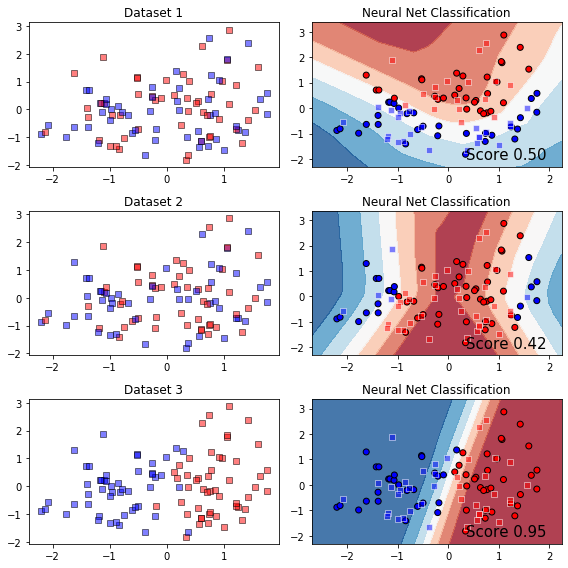

In [54]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

# 데이터 셋 생성

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                          random_state=1, n_clusters_per_class=1)
rng= np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

datasets = [make_moons(noise = 0.3, random_state=0),
           make_circles(noise=0.2, factor=0.5, random_state=1), (X,y)]
figure = plt.figure(figsize = (8,8))

# 데이터 셋 들 마다 반복 

for ds_cnt, ds in enumerate(datasets):
    # 데이터셋을 학습 데이터와 검증 데이터로 나눔
    x,y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= .4, random_state=42)
    
    x_min, x_max = X[:,0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max,0.02),
                        np.arange(y_min, y_max,0.02))
    
    # 데이터 셋을 그리기 위한 설정
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000','#0000FF'])
    
    ax = plt.subplot(len(datasets),2,2*ds_cnt+1)
    ax.set_title("Dataset %d" % (ds_cnt+1))
    
    # 학습 데이터의 산점도
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright, edgecolors="k", marker="s",alpha=0.5)
    
    # 검증 데이터의 산점도 
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test, cmap=cm_bright, edgecolors="k", marker="s",alpha=0.5)
    
    ax= plt.subplot(len(datasets),2,2*ds_cnt+2)

    # 분류 모형 생성 및 예측
    model = MLPClassifier(alpha= 1, max_iter= 1000)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    score = model.score(X_test, y_test)
    # 결정 경계(decision boundary)를 그리기 위함
    if hasattr(model,'decision'):
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]
    # 채워진 등고선 (contourf)이용해 결정 경계를 시각화
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    
    # 학습 데이터의 분류 예측 결과를 산점도로 시각화
    ax.scatter(X_train[:,0],X_train[:,1], c=train_pred, cmap=cm_bright, edgecolors='k')
    
    # 검증 데이터의 분류 예측 결과를 산점도로 시각화
    ax.scatter(X_test[:,0],X_test[:,1], c=test_pred, cmap=cm_bright, edgecolors='w',
              marker='s', alpha=0.5)
    
    ax.set_title('Neural Net Classification')
    ax.text(xx.max() - .3, yy.min() + .3, 
            ('Score %.2f' % score).lstrip('0'),
           size=15, horizontalalignment='right')
    
plt.tight_layout()
plt.show()

## 6절. 분류모형 성능 평가
### 6.1. 평가함수와 분류표 
#### 1) scikit-learn에서 지원하는 성능 평가 함수

In [2]:
from sklearn.model_selection import cross_val_score
cross_val_score()

TypeError: cross_val_score() missing 2 required positional arguments: 'estimator' and 'X'

In [3]:
import pandas as pd

C:\Users\COM\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
result = pd.read_csv("http://javaspecialist.co.kr/pds/382")
result.head()

,CUST_ID,y_true,y_pred
0,37,0,0
1,51,0,0
2,60,0,0
3,65,0,0
4,73,0,0


In [6]:
from sklearn.metrics import classification_report
print(classification_report(result.y_true, result.y_pred))  # 정답, 예측한 값을 집어넣기. 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1635
           1       0.78      0.49      0.60       158

    accuracy                           0.94      1793
   macro avg       0.86      0.74      0.78      1793
weighted avg       0.94      0.94      0.94      1793



### iris 데이터를 이차판별분석 모형을 이용해서 분류하고 roc 커브를 그리세요

In [7]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_model = QuadraticDiscriminantAnalysis()

In [8]:
import seaborn as sns

C:\Users\COM\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [9]:
iris = sns.load_dataset("iris")
iris_x = iris.iloc[:,:-1]
iris_y = iris.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(iris_x,iris_y, test_size= 0.3, random_state=1)

In [13]:
qda_model.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [14]:
y_pred = qda_model.predict(X_test)

In [15]:
pd.crosstab(y_test, y_pred)

col_0,setosa,versicolor,virginica
species,,,
setosa,14,0,0
versicolor,0,18,0
virginica,0,0,13


#### 7) ROC 커브

In [30]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=100, n_features= 2, n_informative= 2, n_redundant=0, random_state=0)

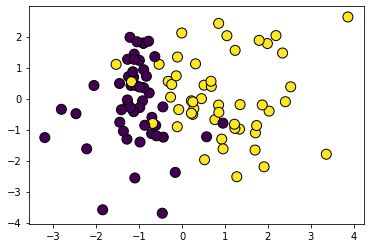

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:,0],X[:,1],marker="o",c=y, s=100, edgecolors="k")
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_hat = model.predict(X)
f_value = model.decision_function(X)

In [38]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.vstack([f_value, y_hat,y]).T,
                 columns=["f","y_hat","y"])
df.sort_values("f",ascending=False).reset_index(drop=True, inplace=True)

In [39]:
df

,f,y_hat,y
0,-1.162727,0.0,0.0
1,-1.663346,0.0,0.0
2,-1.926325,0.0,0.0
3,4.390119,1.0,1.0
4,6.405586,1.0,1.0
...,...,...,...
95,-1.629946,0.0,0.0
96,-1.899069,0.0,0.0
97,7.111102,1.0,1.0
98,-2.189495,0.0,0.0


In [40]:
from sklearn.metrics import roc_curve

In [42]:
roc_curve(y,model.decision_function(X))

(array([0.  , 0.  , 0.  , 0.02, 0.02, 0.04, 0.04, 0.36, 0.36, 0.6 , 0.6 ,
        0.76, 0.76, 1.  ]),
 array([0.  , 0.02, 0.46, 0.46, 0.66, 0.66, 0.94, 0.94, 0.96, 0.96, 0.98,
        0.98, 1.  , 1.  ]),
 array([12.45449559, 11.45449559,  2.6601419 ,  2.65484312,  1.60696234,
         1.50599055, -0.16668978, -1.40700746, -1.408684  , -1.92632464,
        -2.02228104, -2.55383198, -2.65345426, -7.86293217]))

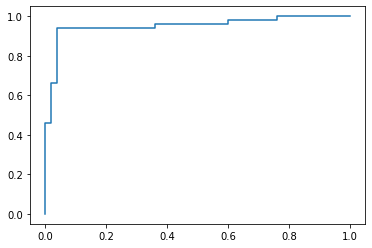

In [43]:
fpr, tpr, thr = roc_curve(y, model.decision_function(X))
plt.plot(fpr,tpr)

- p248

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_hat)

array([[48,  2],
       [ 5, 45]], dtype=int64)

In [47]:
from sklearn.metrics import recall_score
recall_score(y,y_hat)

0.9

In [48]:
from sklearn.metrics import recall_score
specificity = recall_score(y,y_hat, pos_label = 0 )
fallout = 1- specificity
"{:.2f}".format(fallout)

'0.04'

p250 


In [49]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000, weights=[0.95,0.05],random_state=5)

# 두개의 클래스를 0.95, 0.05 로 해라 , 라는 의미 클래스의 갯수는 늘리면 됨

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [53]:
model1 = LogisticRegression().fit(X,y)
model2 = SVC(gamma= 0.0001, C=3000, probability =True ).fit(X,y)


In [54]:
pred1 = model1.predict(X)
pred2 = model2.predict(X)

In [55]:
pd.crosstab(y, pred1)

col_0,0,1
row_0,,
0,940,3
1,30,27


In [56]:
pd.crosstab(y,pred2)

col_0,0,1
row_0,,
0,940,3
1,30,27


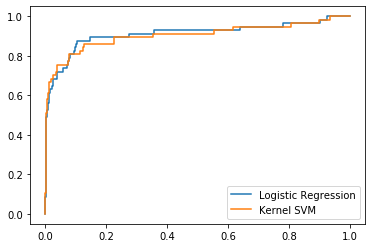

In [62]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thr1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thr2 = roc_curve(y, model2.decision_function(X))
plt.plot(fpr1,tpr1, label= "Logistic Regression")
plt.plot(fpr2,tpr2, label="Kernel SVM")
plt.legend()
plt.show()

# 둘중에 뭐가 좋은지 알려면 auc라는 것으로 확인하기


#### 9) AUC ( Area Under the Curve)

In [65]:
# auc 값이 클수록 좋은 것이다.

from sklearn.metrics import auc

auc(fpr1,tpr1),auc(fpr2,tpr2)

(0.9112202563673234, 0.9037227214377407)

#### 10) 다중 클래스의 ROC 커브

In [107]:
from sklearn.datasets import load_iris
iris = load_iris()

In [108]:
iris_X= iris.data

In [109]:
from sklearn.preprocessing import label_binarize
iris_y= label_binarize(iris.target, [0,1,2])

In [110]:
iris_y  # setosa 이면 1 아니면 0 이런식으로 

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [111]:
from sklearn.naive_bayes import GaussianNB

In [112]:
gnb_model = GaussianNB().fit(iris_X,iris_y[:,0]) # 세토사 인지 아닌지의 결과만 보여지는 것.
gnb_model1 = GaussianNB().fit(iris_X,iris_y[:,1])

In [114]:
fpr0, tpr0, thr0 = roc_curve(iris_y[:,0],gnb_model.predict_proba(iris_X)[:,1])
# 여기엔 .decision_function(X))가 없어서 predict_proba를 사용한것 

In [116]:
fpr1, tpr1, thr1 = roc_curve(iris_y[:,1],
                             gnb_model1.predict_proba(iris_X)[:,1]) 

In [117]:
gnb_model.predict_proba(iris_X)

# 아이리스 데이터가 아닐확률, 아이리스 데이터일 확률
# 1이면 세토라사라는 뜻. PROBA 가능도  몇%로 그럴까 라는 것 

array([[6.71160012e-010, 9.99999999e-001],
       [4.00302403e-009, 9.99999996e-001],
       [1.02351870e-009, 9.99999999e-001],
       [2.76121831e-009, 9.99999997e-001],
       [2.87820863e-010, 1.00000000e+000],
       [3.55110797e-008, 9.99999964e-001],
       [9.66021894e-010, 9.99999999e-001],
       [1.30959533e-009, 9.99999999e-001],
       [4.08140312e-009, 9.99999996e-001],
       [4.28674522e-009, 9.99999996e-001],
       [1.33377359e-009, 9.99999999e-001],
       [1.84532267e-009, 9.99999998e-001],
       [3.38128619e-009, 9.99999997e-001],
       [5.20232440e-009, 9.99999995e-001],
       [1.87082925e-009, 9.99999998e-001],
       [1.24819214e-009, 9.99999999e-001],
       [2.81930547e-009, 9.99999997e-001],
       [1.54701681e-009, 9.99999998e-001],
       [7.33966195e-008, 9.99999927e-001],
       [4.73129136e-010, 1.00000000e+000],
       [4.45844705e-008, 9.99999955e-001],
       [4.58044453e-009, 9.99999995e-001],
       [5.68754049e-010, 9.99999999e-001],
       [3.2

In [118]:
gnb_model.predict_proba(iris_X)[:,1]  # 그 종일 확률을 나타냄 

array([9.99999999e-001, 9.99999996e-001, 9.99999999e-001, 9.99999997e-001,
       1.00000000e+000, 9.99999964e-001, 9.99999999e-001, 9.99999999e-001,
       9.99999996e-001, 9.99999996e-001, 9.99999999e-001, 9.99999998e-001,
       9.99999997e-001, 9.99999995e-001, 9.99999998e-001, 9.99999999e-001,
       9.99999997e-001, 9.99999998e-001, 9.99999927e-001, 1.00000000e+000,
       9.99999955e-001, 9.99999995e-001, 9.99999999e-001, 9.99996760e-001,
       9.99999860e-001, 9.99999982e-001, 9.99999963e-001, 9.99999998e-001,
       9.99999998e-001, 9.99999996e-001, 9.99999992e-001, 9.99999917e-001,
       1.00000000e+000, 1.00000000e+000, 9.99999996e-001, 9.99999998e-001,
       9.99999996e-001, 1.00000000e+000, 9.99999998e-001, 9.99999998e-001,
       9.99999999e-001, 9.99999940e-001, 9.99999999e-001, 9.99991307e-001,
       9.99999567e-001, 9.99999992e-001, 1.00000000e+000, 9.99999999e-001,
       9.99999999e-001, 9.99999999e-001, 1.06857205e-109, 6.21929944e-102,
       5.95805983e-124, 4

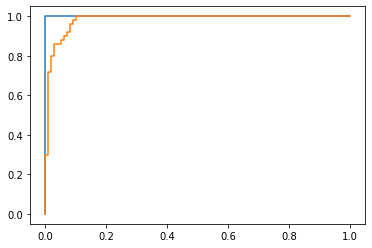

In [119]:
plt.plot(fpr0,tpr0)
plt.plot(fpr1,tpr1)

### 6.2. 분류 모형의 성능 비교

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

- 다음 코드는 성능을 비교할 분류 모형들의 이름

In [146]:
names = ["Nearest Neighbors","Linear SVM","RBF SVM","Gaussian Process","Decision Tree", 
         "Random Forest","Neual Net","AdaBoost","Navie Bayes","QDA"]

- 분류모형 , 위의 모형의 이름순서대로 분류모형을 생성함

In [160]:
classifiers ={
    KNeighborsClassifier(3),
    SVC(kernel="linear",C=0.025),
    SVC(gamma=2,C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
}

####  분류 데이터 셋을 만듦 . 호, 원, 선 모양으로 분류된 3가지 데이터 셋을 만듦
- make moons 함수는 초승달 모양 클러스터 두 개 형상의 데이터를 생성한다. make_moons 명령으로 만든 데이터는 직선을 사용하여 분류할 수 없다.

In [161]:
X,y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1) # 나만의 분류 만들기 
rng = np.random.RandomState(2)
X += 2* rng.uniform(size = X.shape)
linearly_separable = (X,y)

datasets = [make_moons(noise=0.3,random_state=0), # arc  
           make_circles(noise=0.2 , factor=0.5, random_state=1), #circle
           linearly_separable  # linear 
           ] 

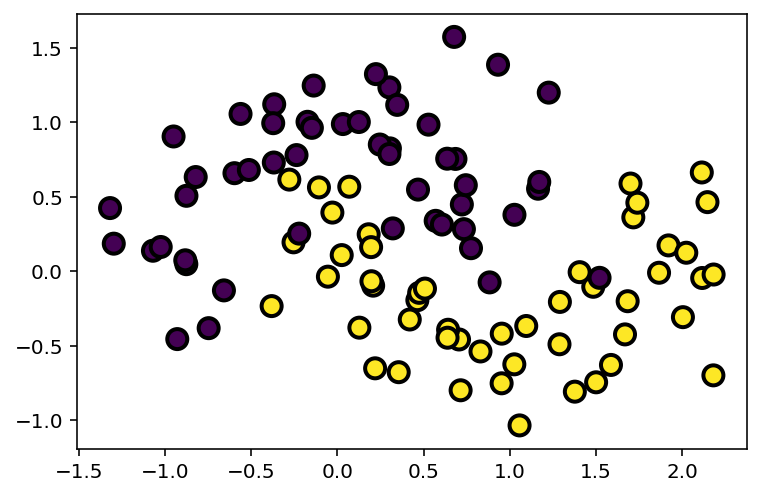

In [168]:
X,b =make_moons(noise=0.3,random_state=0)
plt.scatter(X[:,0],X[:,1],marker="o",c=b,s=100,edgecolor="k",linewidth=2)

# 아래의 1번 2번 3번의 ROW 모습 

### 반복문을 실행하면서 앞에서 정의한 분류모형들을 이용해서 데이터를 학습시키고 산점도와 등고선 그래프를 나타냄 

####  StandardScaler() : 각 feature의 평균을 0, 분산을 1로 변경합니다. 모든 특성들이 같은 스케일을 갖게 됩니다.
- 데이터 스케일링이란 데이터 전처리 과정의 하나입니다. https://homeproject.tistory.com/3

#### np.meshgrid : 플롯 팅을위한 일종의 좌표 격자를 생성한다는 것/ x 값의 배열과 y 값의 배열로 직사각형 격자

#### plt.cm.: 에는 다양한 색깔의 조합이 있나봄 ex, rainbow, RdBu, autumn

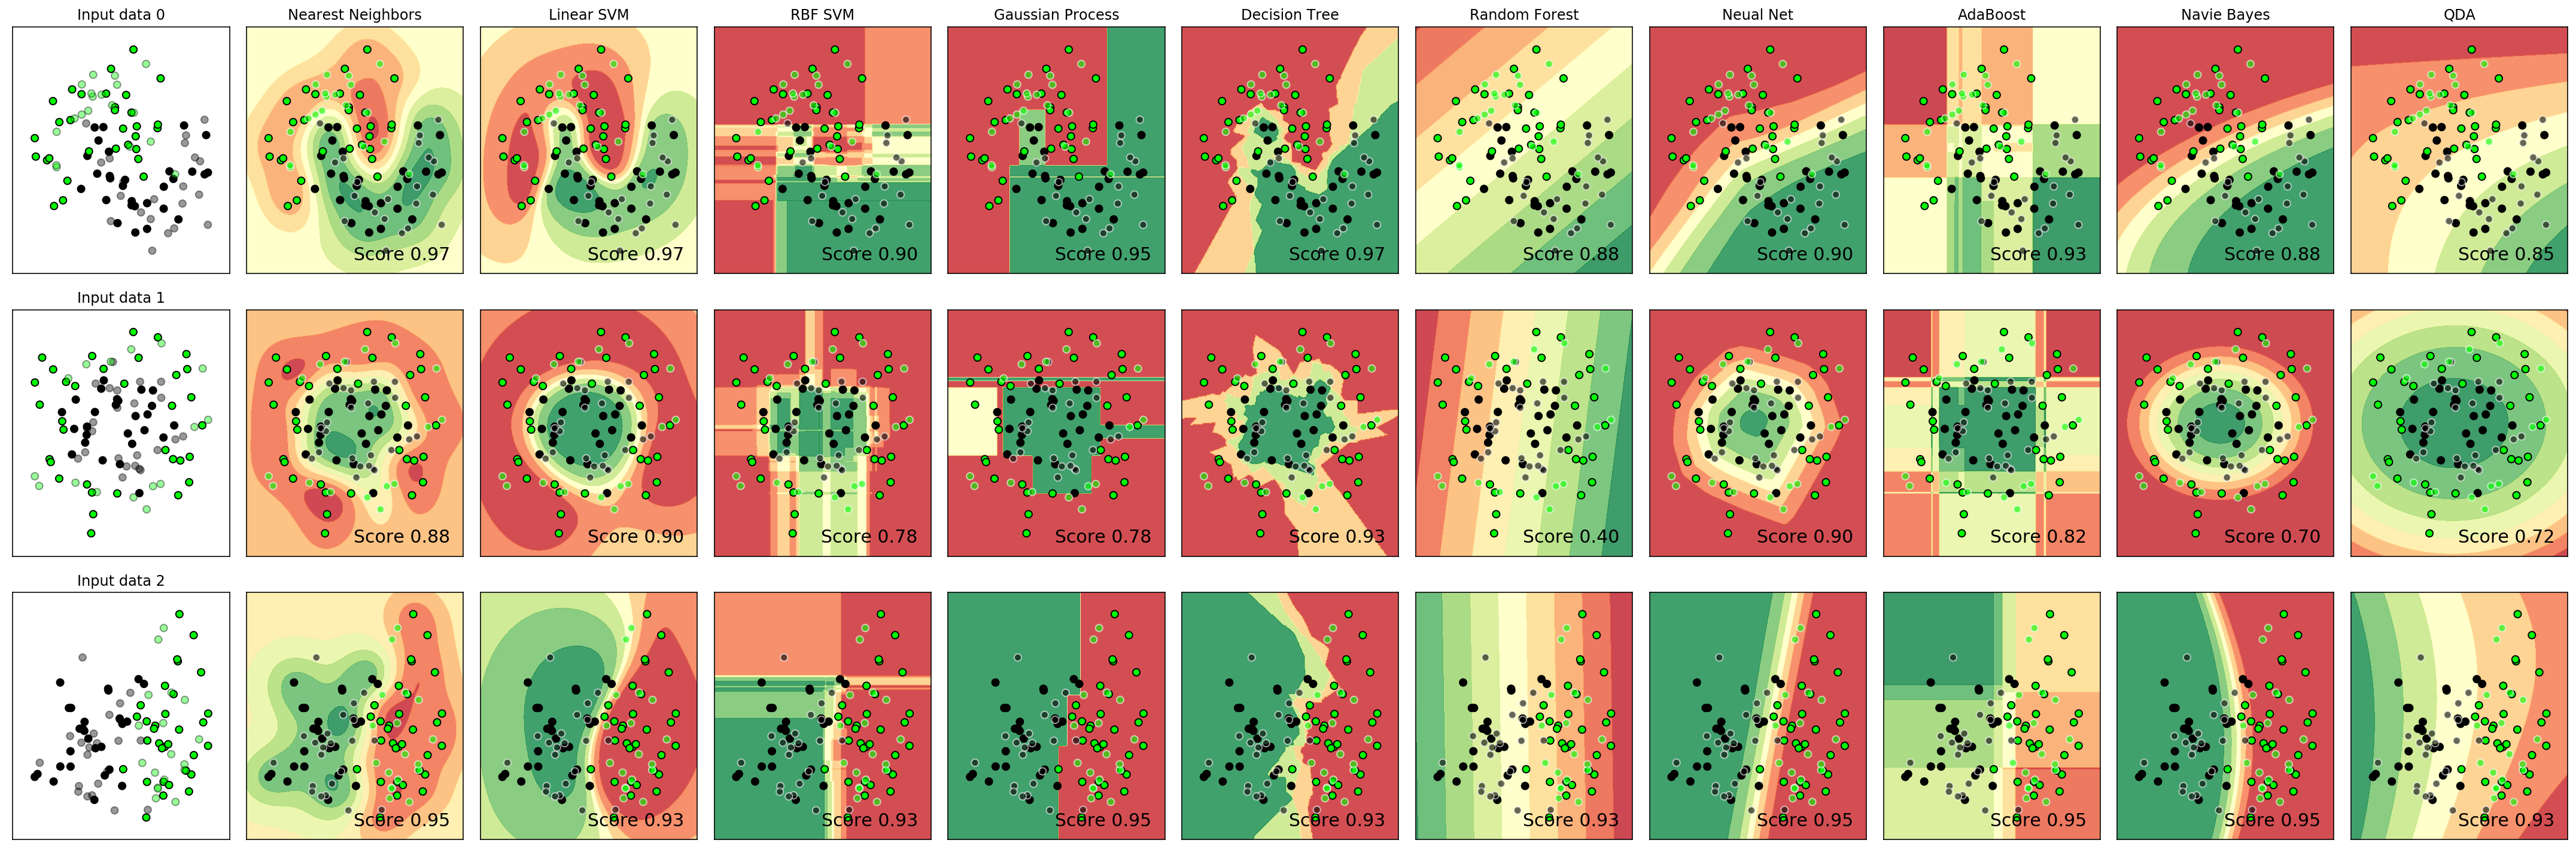

In [170]:
figure=plt.figure(figsize=(30,10))  # 그래프의 사이즈를 그리기 
h=.02 # 격자단계 
i=1


# 데이터 셋들 마다 반복 
for ds_cnt, ds in enumerate(datasets):   # 위에 있는 그래프
    # 데이터셋을 학습 데이터와 검증 데이터로 나눔
    X,y = ds
    X = StandardScaler().fit_transform(X) #  학습시키고 변환 
    X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= .4, random_state=42) # train과test 셋으로 나눔 

    # 격자를 만들어 주기 위한 것. - > 있으나 없느나 결과는 같은데 왜 만들어 주는 거지? 
    x_min, x_max = X[:,0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max,h), # x값의 범위를 x축으로
                        np.arange(y_min, y_max,h)) # y축으로 만들어줌..
    
    # 데이터 셋을 그리기 위한 설정
    cm = plt.cm.RdYlGn  # 색깔을 하기위한 설정 plt.cm.RdBu  로 책에 적혀있지만, 다른거 써도됨. 
    cm_bright = ListedColormap(['#00FF00','#000000'])  # 산점도의 점들의 색깔이 바뀌네
    ax = plt.subplot(len(datasets),len(classifiers)+1,i) # 분류데이터 셋과 분류모형에 따라서 SUBPLOT 을 나눠줌 
    ax.set_title('Input data %d' % ds_cnt)
    
    # 학습 데이터의 산점도
    # 산점도를 그리는데, cmap은 위의 설정한 값으로 그린다. 
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright, edgecolors="k") 
    
    
    # 검증 데이터의 산점도 
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test, cmap=cm_bright, edgecolors="k",alpha=0.4)
    ax.set_xlim(xx.min(),xx.max())  # x 축의 한계
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(()) # x, y축으로 사용할 값
    ax.set_yticks(())
    i += 1
    
    # 각 분류기마다 반복처리함    
    for name, model in zip(names, classifiers):
        ax = plt.subplot(len(datasets),len(classifiers)+1,i)
        model.fit(X_train,y_train)
        score=model.score(X_test,y_test)
        
        #결정 경계(decision boundary)를 그리기 위함
        # [x_min, x_max]x[y_min,y_max].
        if hasattr(model,'decision_function'):  # hasattr 은 model 변수가 있는지 확인하는 것이다. 
            Z=model.decision_function(np.c_[xx.ravel(),yy.ravel()]) # ravel 은 차원을 푸는 것이고 차원을 풀어서 집어넣음 .
        else:
            Z=model.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]

        # 채워진 등고선 (contourf)이용해 결정 경계를 시각화
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    
        # 학습 데이터의 분류 예측 결과를 산점도로 시각화
        ax.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap=cm_bright, edgecolors='k')
    
        # 검증 데이터의 분류 예측 결과를 산점도로 시각화
        ax.scatter(X_test[:,0],X_test[:,1], c=y_test, cmap=cm_bright, edgecolors='w',alpha=0.6)
        
        ax.set_xlim(xx.min(),xx.max())
        ax.set_ylim(yy.min(),yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt==0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, 
            ('Score %.2f' % score).lstrip('0'),
           size=15, horizontalalignment='right')
        i += 1

        
    
plt.tight_layout()
plt.show()